<a href="https://colab.research.google.com/github/SSZ5/Data_Visualization_Project/blob/main/DV_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!gdown --id 1aj-TbFjZcLSjkiT6EAUbKRZwlaoindTp

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1aj-TbFjZcLSjkiT6EAUbKRZwlaoindTp
To: /content/Sleep_Efficiency.csv
100% 41.4k/41.4k [00:00<00:00, 47.3MB/s]


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from datetime import datetime

In [28]:
df = pd.read_csv("/content/Sleep_Efficiency.csv")

print(f"{df.shape[0] - df.dropna().shape[0]} rows if all null rows dropped")
print(f"{((df.shape[0] - df.dropna().shape[0]) / df.shape[0]) * 100 :.1f}% of data lost if null rows dropped")

64 rows if all null rows dropped
14.2% of data lost if null rows dropped


In [29]:
df = pd.read_csv("/content/Sleep_Efficiency.csv")
#df = df.set_index('ID')
print(df.shape)
df.dropna(inplace = True)
display(df.head())
print(df.shape)
print(df.columns)

(452, 15)


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


(388, 15)
Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')


In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      388 non-null    int64  
 1   Age                     388 non-null    int64  
 2   Gender                  388 non-null    object 
 3   Bedtime                 388 non-null    object 
 4   Wakeup time             388 non-null    object 
 5   Sleep duration          388 non-null    float64
 6   Sleep efficiency        388 non-null    float64
 7   REM sleep percentage    388 non-null    int64  
 8   Deep sleep percentage   388 non-null    int64  
 9   Light sleep percentage  388 non-null    int64  
 10  Awakenings              388 non-null    float64
 11  Caffeine consumption    388 non-null    float64
 12  Alcohol consumption     388 non-null    float64
 13  Smoking status          388 non-null    object 
 14  Exercise frequency      388 non-null    fl

In [31]:
df["Bedtime"] = pd.to_datetime(df["Bedtime"])
df["Wakeup time"] = pd.to_datetime(df["Wakeup time"])
df["Awakenings"] = df["Awakenings"].astype("int")
df["Exercise frequency"] = df["Exercise frequency"].astype("int")

In [32]:
import datetime
from datetime import datetime

# Assuming df['Bedtime'][0] is a valid datetime object
hour = [i.hour for i in df['Bedtime'].tolist()] #str(df['Bedtime'].hour)  # Extract the hour and convert to string
minute =  [i.minute for i in df['Bedtime'].tolist()] #str(df['Bedtime'].minute)  # Extract the minute and convert to string
#time_str = [str(i)+":" + str(j) for i,j in zip(hour,minute)] #hour + ":" + minute  # Concatenate the hour and minute
time_str = [i for i,j in zip(hour,minute)] #hour + ":" + minute  # Concatenate the hour and minute

#print(time_str)  # Print the concatenated string

df['Bedtime_hour'] = time_str

hour = [i.hour for i in df['Wakeup time'].tolist()] #str(df['Bedtime'].hour)  # Extract the hour and convert to string
minute =  [i.minute for i in df['Wakeup time'].tolist()] #str(df['Bedtime'].minute)  # Extract the minute and convert to string
#time_str = [str(i)+":" + str(j) for i,j in zip(hour,minute)] #hour + ":" + minute  # Concatenate the hour and minute
time_str = [i for i,j in zip(hour,minute)] #hour + ":" + minute  # Concatenate the hour and minute
#print(time_str)  # Print the concatenated string

df['Wakeup time_hour'] = time_str

print(set(df['Bedtime_hour'].tolist()))
print(set(df['Wakeup time_hour'].tolist()))

display(df.head())

{0, 1, 2, 21, 22, 23}
{3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Bedtime_hour,Wakeup time_hour
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0,0.0,0.0,Yes,3,1,7
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3,0.0,3.0,Yes,3,2,9
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1,0.0,0.0,No,3,21,5
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3,50.0,5.0,Yes,1,2,8
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3,0.0,3.0,No,3,1,9


##  Bedtime vs Awakenings

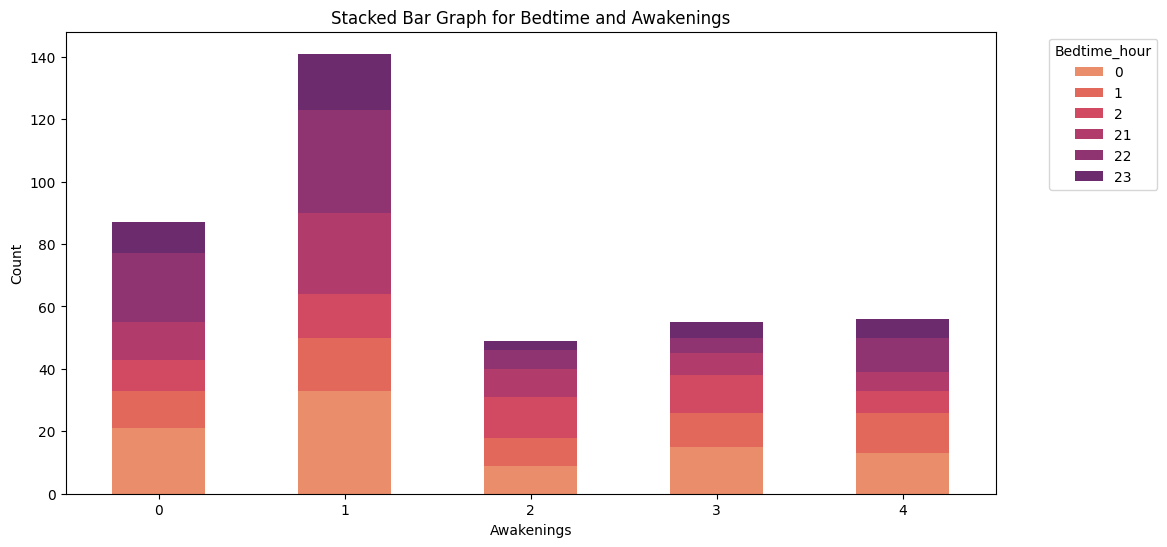

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette to "flare"
sns.set_palette("flare")

# Group the data based on bedtime hour and awakenings
grouped_data = df.groupby(['Bedtime_hour', 'Awakenings']).size().reset_index(name='Count')

# Pivot the grouped data to create a suitable format for the stacked bar graph
pivot_data = grouped_data.pivot(index='Awakenings', columns='Bedtime_hour', values='Count').fillna(0)

# Create the stacked bar graph
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Awakenings')
plt.ylabel('Count')
plt.title('Stacked Bar Graph for Bedtime and Awakenings')
plt.legend(title='Bedtime_hour', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.show()


## Gender vs. Sleep Efficiency

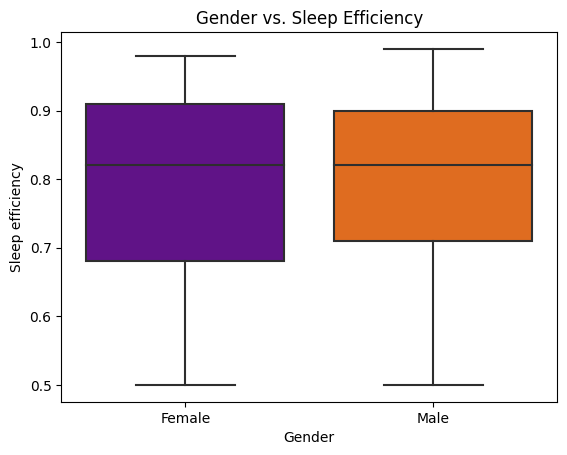

In [55]:
import seaborn as sns

palette = {'Male': '#ff6500', 'Female': '#66009a'}


sns.boxplot(x='Gender', y='Sleep efficiency', data=df, palette=palette)
plt.title('Gender vs. Sleep Efficiency')
plt.show()

# No relation between gender and sleep efficiency

## Smoking status vs. Sleep Efficiency

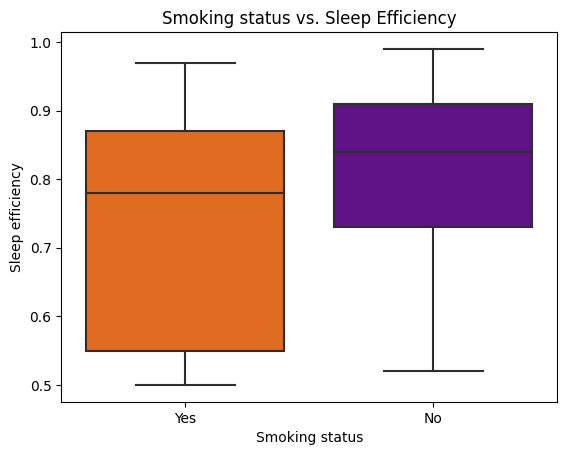

In [35]:
import seaborn as sns

palette = {'No': '#66009a', 'Yes': '#ff6500'}

sns.boxplot(x='Smoking status', y='Sleep efficiency', data=df, palette=palette)
plt.title('Smoking status vs. Sleep Efficiency')
plt.show()


## Exercise frequency vs. Sleep Efficiency

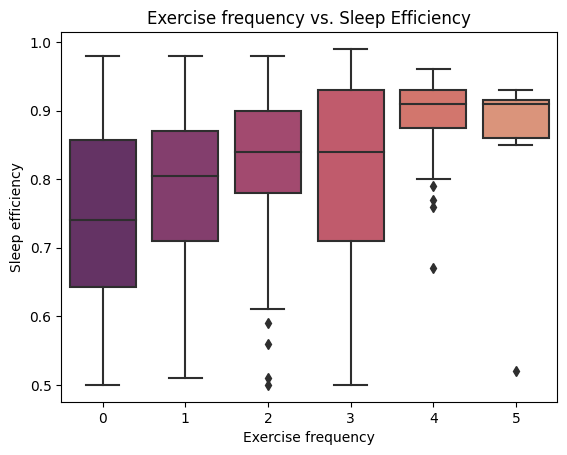

In [36]:
sns.set_palette("flare_r")

sns.boxplot(x='Exercise frequency', y='Sleep efficiency', data=df)
plt.title('Exercise frequency vs. Sleep Efficiency')
plt.show()

## Alcohol consumption vs. Sleep Efficiency

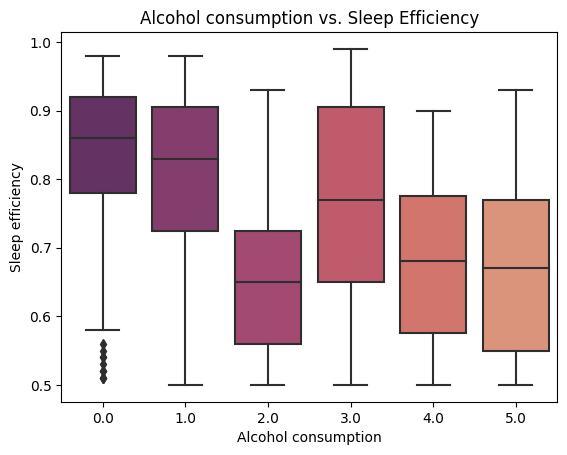

In [37]:
sns.set_palette("flare_r")

sns.boxplot(x='Alcohol consumption', y='Sleep efficiency', data=df)
plt.title('Alcohol consumption vs. Sleep Efficiency')
plt.show()

## Caffeine consumption vs. Sleep Efficiency

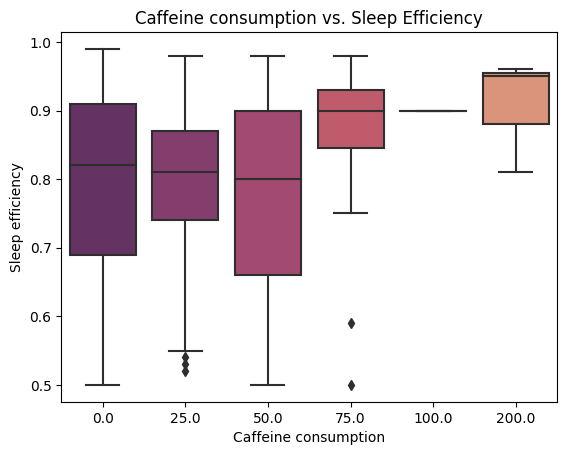

In [38]:
sns.set_palette("flare_r")

sns.boxplot(x='Caffeine consumption', y='Sleep efficiency', data=df)
plt.title('Caffeine consumption vs. Sleep Efficiency')
plt.show()

## Bedtime_hour	vs Sleep efficiency

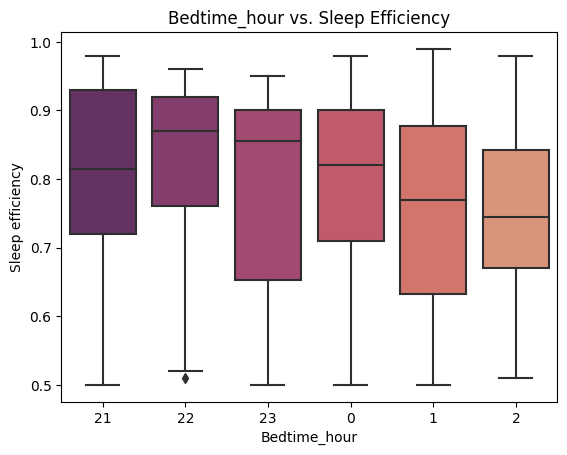

In [39]:
sns.set_palette("flare_r")

sns.boxplot(x='Bedtime_hour', y='Sleep efficiency', data=df, order=[21,22,23,0,1,2])
plt.title('Bedtime_hour vs. Sleep Efficiency')
plt.show()

## Age vs Sleep duration

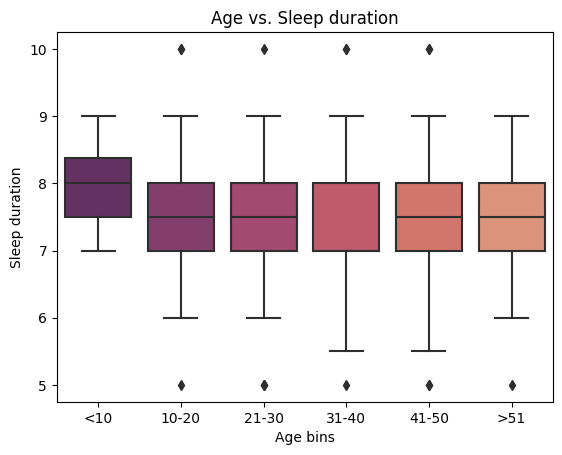

In [40]:
import pandas as pd

# create bins using pandas cut function
bins = pd.cut(df['Age'], bins=[10, 20, 30, 40, 50, 60, 70 ], labels=['<10', '10-20', '21-30', '31-40', '41-50', '>51'])
#bins = pd.cut(df['Age'], bins=[10, 20, 30, 40, 50, 60, 70 ], labels=['<18', '18-24', '25-34', '35-44', '45-54', '>54'])

# add the binned data to the dataset
df['Age bins'] = bins

sns.set_palette("flare_r")

# create a boxplot with age bins on the x-axis
sns.boxplot(x='Age bins', y='Sleep duration', data=df)

# show the plot
plt.title('Age vs. Sleep duration')
plt.show()

## Smoking status vs. REM sleep percentage

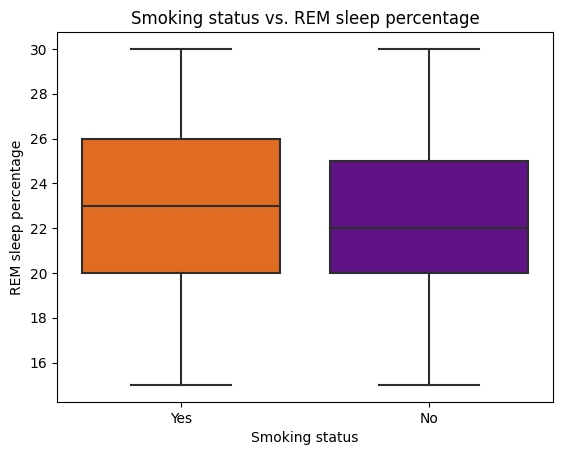

In [41]:
palette = {'No': '#66009a', 'Yes': '#ff6500'}

sns.boxplot(x='Smoking status', y='REM sleep percentage', data=df, palette = palette)
plt.title('Smoking status vs. REM sleep percentage')
plt.show()

## Exercise vs. REM sleep percentage

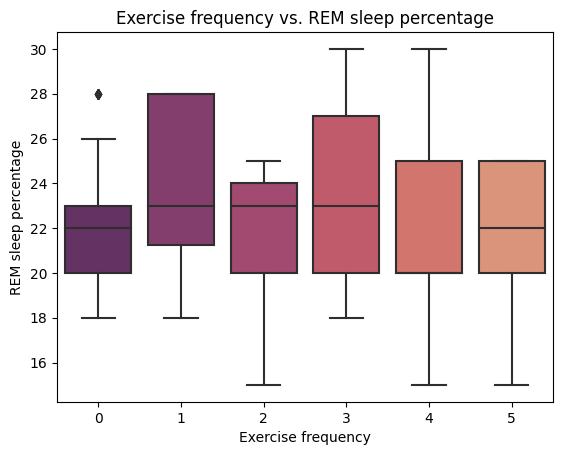

In [42]:
sns.set_palette("flare_r")

# Box plot for Exercise frequency vs. Sleep Efficiency
sns.boxplot(x='Exercise frequency', y='REM sleep percentage', data=df)
plt.title('Exercise frequency vs. REM sleep percentage')
plt.show()

<ipython-input-43-f69dfa1ab005>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='flare', vmin=-1, vmax=1, center=0, fmt='.2f', linewidths=0.5)


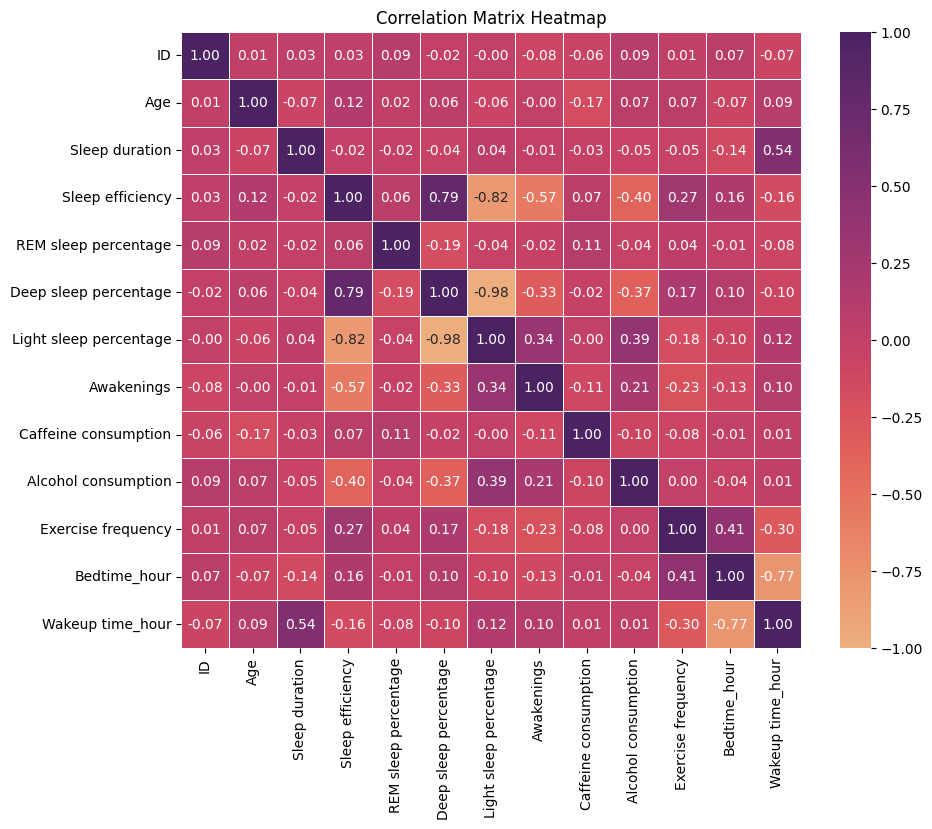

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='flare', vmin=-1, vmax=1, center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

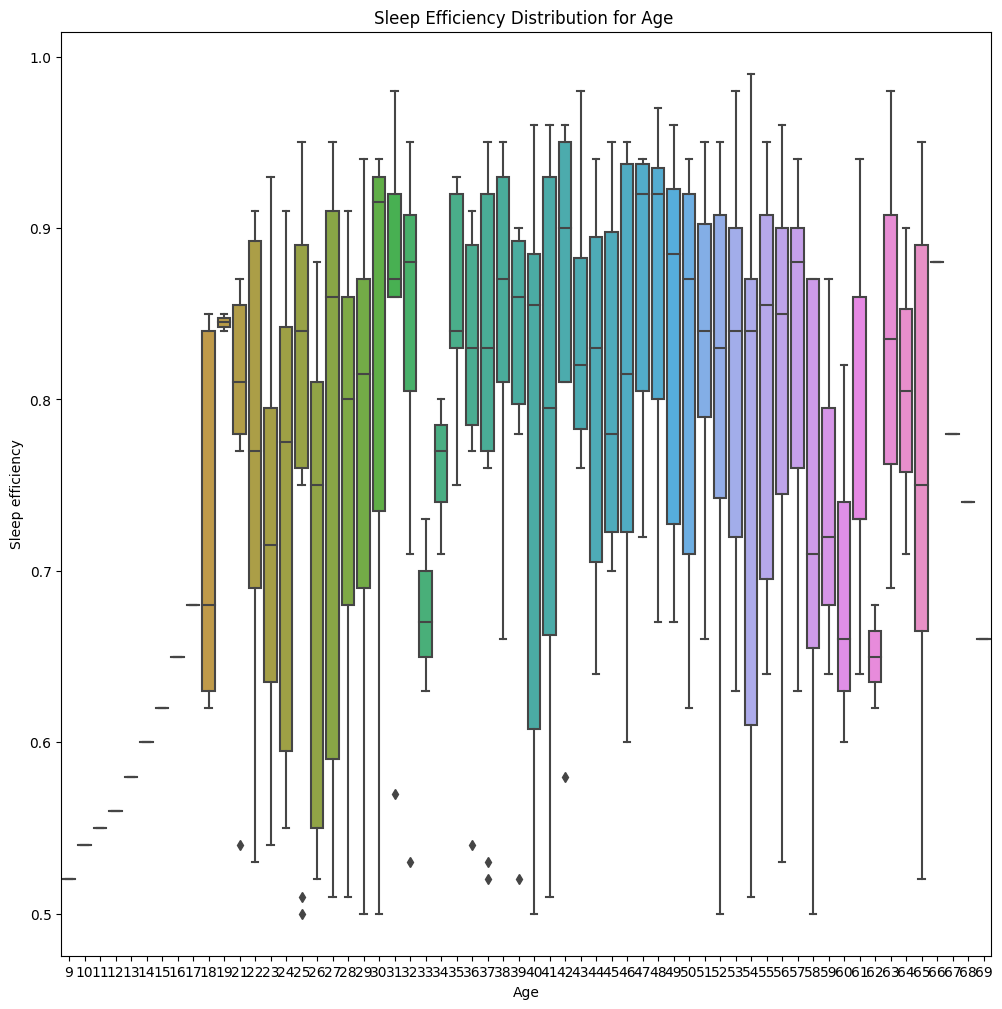

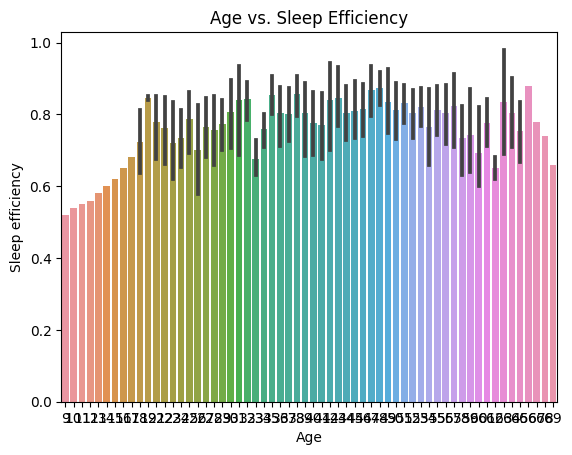

In [44]:
import seaborn as sns
plt.figure(figsize=(12,12))

sns.boxplot(x='Age', y='Sleep efficiency', data=df)
plt.title('Sleep Efficiency Distribution for Age ')
plt.show()
# Bar chart for Age vs. Sleep Efficiency
sns.barplot(x='Age', y='Sleep efficiency', data=df)
plt.title('Age vs. Sleep Efficiency')
plt.show()

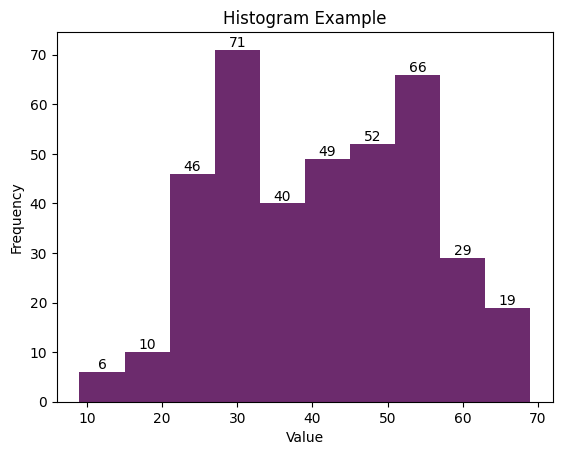

In [45]:
import matplotlib.pyplot as plt
'''
s=df['Age']
plt.hist(s)

plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
'''
s = df['Age']

# Create a histogram
counts, bins, patches = plt.hist(s)

# Add the count as text to the top of each bar
for i in range(len(counts)):
    plt.text(bins[i] + (bins[i+1] - bins[i])/2, counts[i], str(int(counts[i])), ha='center', va='bottom')

# Add a title and axis labels
plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [46]:
'''
Impute missing values: If dropping missing values might lead to a loss of valuable information, you can impute them using various techniques:

a. Mean or median imputation: Replace null values with the mean or median value of the respective column. This approach is suitable when the missing data is continuous and not heavily skewed.
'''
df['Awakenings'].fillna(df['Awakenings'].mean(), inplace=True)
df['Caffeine consumption'].fillna(df['Caffeine consumption'].mean(), inplace=True)
df['Alcohol consumption'].fillna(df['Alcohol consumption'].mean(), inplace=True)
df['Exercise frequency'].fillna(df['Exercise frequency'].mean(), inplace=True)

print(df['Awakenings'].mean())
print(df['Caffeine consumption'].mean())
print(df['Alcohol consumption'].mean())
print(df['Exercise frequency'].mean())

df.isnull().sum()


1.6185567010309279
22.68041237113402
1.1469072164948453
1.7577319587628866


ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
Bedtime_hour              0
Wakeup time_hour          0
Age bins                  2
dtype: int64

In [47]:
'''
b. Mode imputation: Replace null values with the mode (most frequent value) of the respective column. This approach is more suitable for categorical data or discrete numerical data.
'''

df['Awakenings'].fillna(df['Awakenings'].median(), inplace=True)
df['Caffeine consumption'].fillna(df['Caffeine consumption'].median(), inplace=True)
df['Alcohol consumption'].fillna(df['Alcohol consumption'].median(), inplace=True)
df['Exercise frequency'].fillna(df['Exercise frequency'].median(), inplace=True)

df.isnull().sum()


ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
Bedtime_hour              0
Wakeup time_hour          0
Age bins                  2
dtype: int64

Text(0.5, 1.0, 'Sleep Efficiency Distribution for Each Sleep Duration')

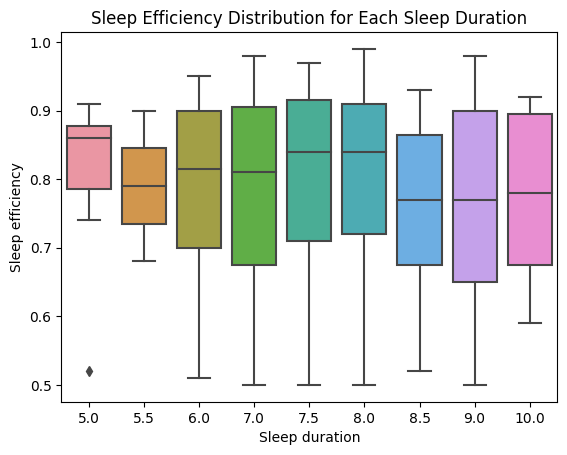

In [48]:
sns.set_palette("flare_r")

sns.boxplot(x='Sleep duration', y='Sleep efficiency', data=df)
plt.title('Sleep Efficiency Distribution for Each Sleep Duration')

"\nplt.scatter(df['REM sleep percentage'], df['Sleep efficiency'])\nplt.xlabel('REM sleep percentage')\nplt.ylabel('Sleep Efficiency')\nplt.show()\n"

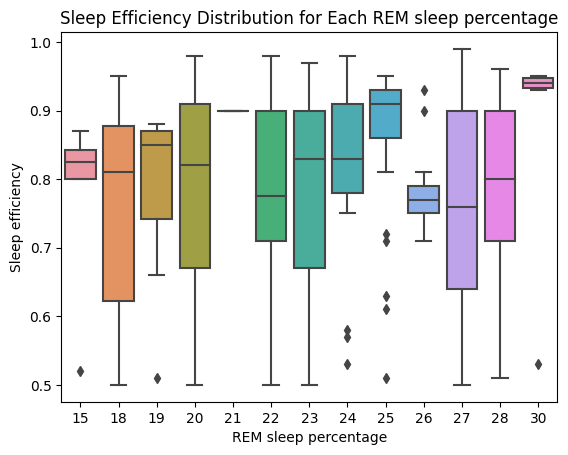

In [49]:
# Scatter plot for REM sleep percentage vs. Sleep Efficiency
sns.boxplot(x='REM sleep percentage', y='Sleep efficiency', data=df)
plt.title('Sleep Efficiency Distribution for Each REM sleep percentage')

'''
plt.scatter(df['REM sleep percentage'], df['Sleep efficiency'])
plt.xlabel('REM sleep percentage')
plt.ylabel('Sleep Efficiency')
plt.show()
'''

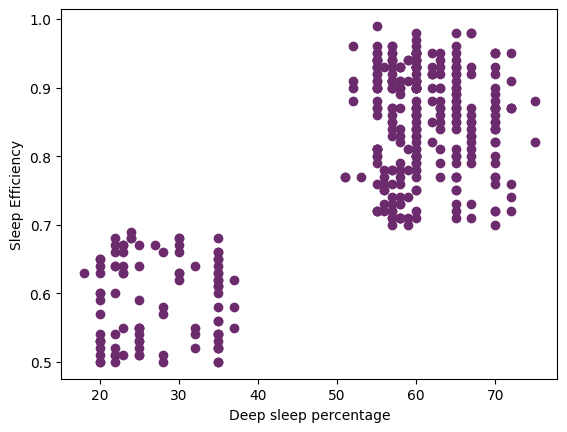

In [50]:
# Scatter plot for Deep sleep percentage vs. Sleep Efficiency
plt.scatter(df['Deep sleep percentage'], df['Sleep efficiency'])
plt.xlabel('Deep sleep percentage')
plt.ylabel('Sleep Efficiency')
plt.show()

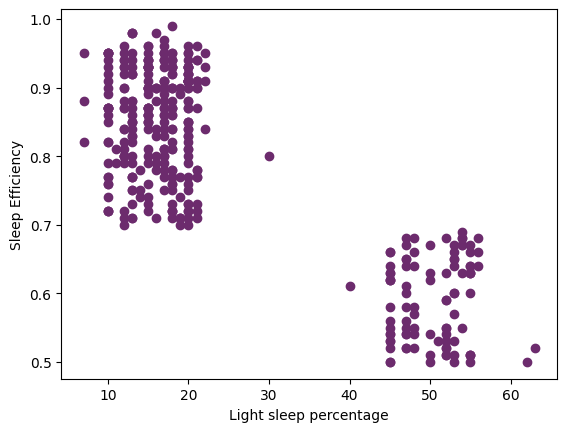

In [51]:
# Scatter plot for Light sleep percentage vs. Sleep Efficiency
plt.scatter(df['Light sleep percentage'], df['Sleep efficiency'])
plt.xlabel('Light sleep percentage')
plt.ylabel('Sleep Efficiency')
plt.show()

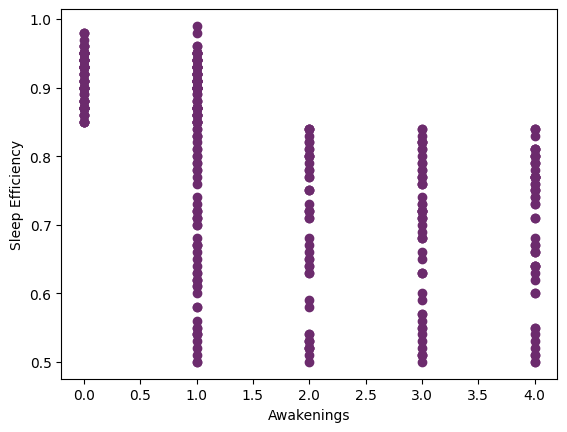

In [52]:
# Scatter plot for Awakenings vs. Sleep Efficiency
plt.scatter(df['Awakenings'], df['Sleep efficiency'])
plt.xlabel('Awakenings')
plt.ylabel('Sleep Efficiency')
plt.show()

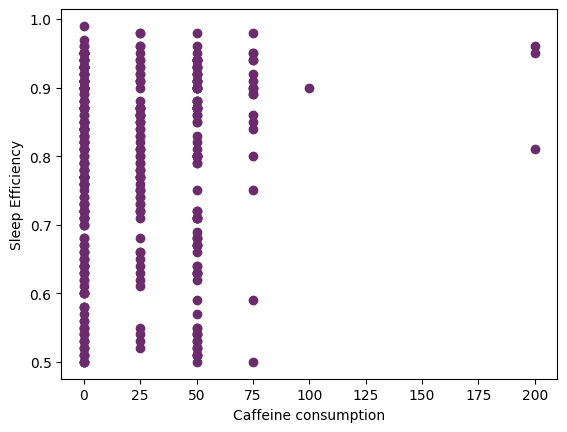

In [53]:
# Scatter plot for Caffeine consumption vs. Sleep Efficiency
plt.scatter(df['Caffeine consumption'], df['Sleep efficiency'])
plt.xlabel('Caffeine consumption')
plt.ylabel('Sleep Efficiency')
plt.show()

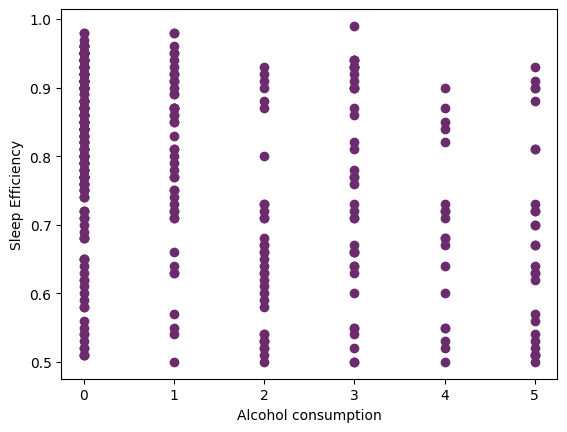

In [54]:
# Scatter plot for Alcohol consumption vs. Sleep Efficiency
plt.scatter(df['Alcohol consumption'], df['Sleep efficiency'])
plt.xlabel('Alcohol consumption')
plt.ylabel('Sleep Efficiency')
plt.show()